# Random Walk Simulator

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
import seaborn as sns

## Choose Grid Size and Color

In [3]:
grid_size = 11
color = 'Blues' # Oranges, Blues, Greens, Reds, binary_r (black & white)

## Calculation and Visualization

In [46]:
empty = np.array([[0] * grid_size] * grid_size)
empty = empty.reshape(grid_size, grid_size)

i, j = grid_size // 2, grid_size // 2
empty[i][j] = 1
x = 0

while True:

    direction = np.random.choice(['n', 'e', 's', 'w', 'ne', 'se', 'sw', 'nw'])

    if direction == 'n':
        i -= 1

    elif direction == 'e':
        j += 1

    elif direction == 's':
        i += 1

    elif direction == 'w':
        j -= 1


    elif direction == 'ne':
        i -= 1
        j += 1

    elif direction == 'se':
        i += 1
        j += 1

    elif direction == 'sw':
        i += 1
        j -= 1

    elif direction == 'nw':
        i -= 1
        j -= 1


    # border constraint  
    if (i < 0) or (i > (grid_size-1)) or (j < 0) or (j > (grid_size-1)):
        break
    else:
        empty[i][j] += 1
        x += 1
        
##     uncomment to export single images
#     ax = sns.heatmap(empty, square=True, cmap=color, cbar=False, xticklabels=False, yticklabels=False, vmin=0)
#     sns_plot = ax.get_figure()
#     sns_plot.savefig('output/' + str(x) + ".png")
#     clear_output(wait=False)


steps = sum(sum(empty))
rate = np.round((steps / grid_size), 2)
log_rate = np.round((np.log(steps) / np.log(grid_size)), 2)

## Visualization

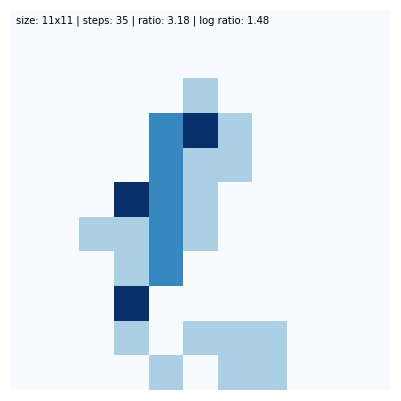

In [43]:
text = (
    'size:' +' '+ str(grid_size) +'x'+ str(grid_size) +' '+
    '| steps:' +' '+ str(sum(sum(empty))) +' '+
    '| ratio:' +' '+ str(rate) +' '+
    '| log ratio:' +' '+ str(log_rate)
)

fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(empty, square=True, cmap=color, cbar=False, xticklabels=False, yticklabels=False, robust=False)

ax.annotate(
    text, xy=(0,1), xycoords="axes fraction",
    xytext=(5,-5), textcoords="offset points",
    ha="left", va="top"
)

plt.show()

## Export

In [18]:
sns_plot = ax.get_figure()
sns_plot.savefig(str(grid_size) +'x'+ str(grid_size) +'-'+str(time.time()) + ".png", dpi=300)

## Using numba to enhance calculation time

In [31]:
def calc(grid_size):
    empty = np.array([[0] * grid_size] * grid_size)
    empty = empty.reshape(grid_size, grid_size)

    i, j = grid_size // 2, grid_size // 2
    empty[i][j] = 1
    x = 0

    while True:

        direction = np.random.choice(['n', 'e', 's', 'w', 'ne', 'se', 'sw', 'nw'])

        if direction == 'n':
            i -= 1

        elif direction == 'e':
            j += 1

        elif direction == 's':
            i += 1

        elif direction == 'w':
            j -= 1


        elif direction == 'ne':
            i -= 1
            j += 1

        elif direction == 'se':
            i += 1
            j += 1

        elif direction == 'sw':
            i += 1
            j -= 1

        elif direction == 'nw':
            i -= 1
            j -= 1


        # border constraint  
        if (i < 0) or (i > (grid_size-1)) or (j < 0) or (j > (grid_size-1)):
            break
        else:
            empty[i][j] += 1
            x += 1


    return empty

In [8]:
import numba

test_jit = numba.jit(calc)

In [11]:
%timeit calc(701)

The slowest run took 5.60 times longer than the fastest. This could mean that an intermediate result is being cached.
1.1 s ± 699 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit test_jit(701)

The slowest run took 4.84 times longer than the fastest. This could mean that an intermediate result is being cached.
826 ms ± 439 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Choose Grid Size

In [34]:
grid_size = 5001

## Calculation

In [35]:
array = test_jit(grid_size)

## Visualization

In [ ]:
color = 'binary_r' # Oranges, Blues, Greens, Reds, binary_r (black & white),

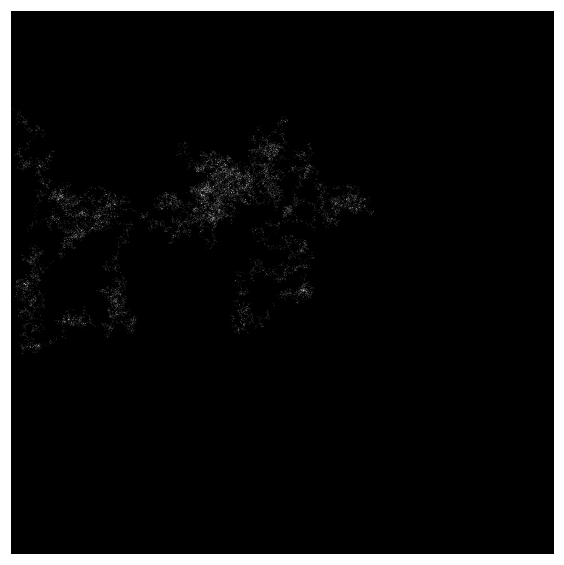

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(array, square=True, cmap=color, cbar=False, xticklabels=False, yticklabels=False, robust=False)

## Export

In [37]:
timestamp = round(time.time())

sns_plot = ax.get_figure()
sns_plot.savefig(str(grid_size) +'x'+ str(grid_size) +'-'+str(timestamp) + ".png", dpi=1200)